In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Polynomial regression

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

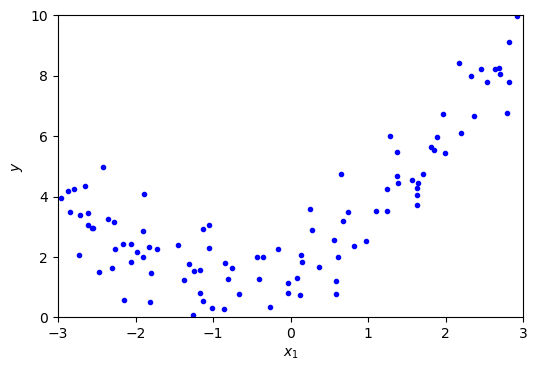

In [3]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X, y, "b.")
xmin, xmax, ymin, ymax = [-3, 3, 0, 10]
ax.set(xlabel="$x_1$", ylabel="$y$", xlim=[xmin, xmax], ylim=[ymin, ymax])
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [5]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [6]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

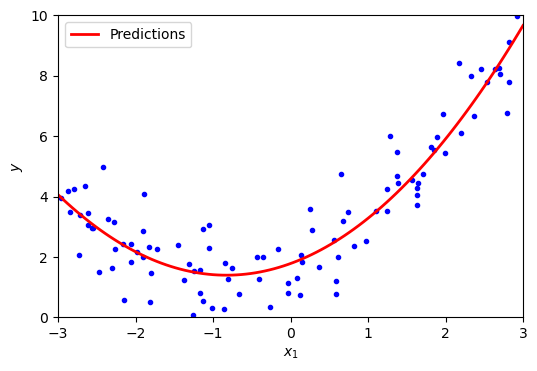

In [8]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X, y, "b.")
ax.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

xmin, xmax, ymin, ymax = [-3, 3, 0, 10]
ax.set(xlabel="$x_1$", ylabel="$y$", xlim=[xmin, xmax], ylim=[ymin, ymax])
ax.legend(loc="upper left", fontsize='medium')

plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

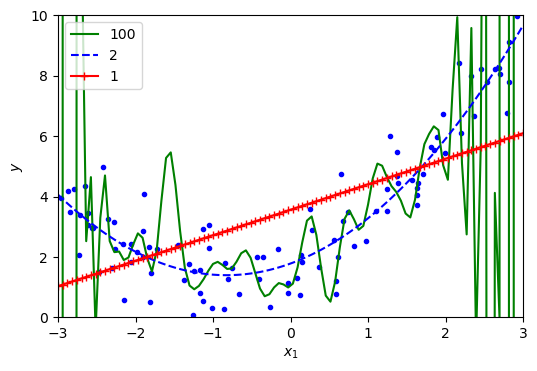

In [10]:
styles = ["g-", "b--", "r-+"]
degrees = [100, 2, 1]

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X, y, "b.", linewidth=3)

for style, d in zip(styles, degrees):
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_new = polynomial_regression.predict(X_new)
    ax.plot(X_new, y_new, style, label=str(d))

xmin, xmax, ymin, ymax = [-3, 3, 0, 10]
ax.set(xlabel="$x_1$", ylabel="$y$", xlim=[xmin, xmax], ylim=[ymin, ymax])
ax.legend(loc="upper left")

plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [12]:
def plot_learning_curves(model, X, y, ax):
    X_train, X_val, y_train, y_val = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    ax.plot(np.sqrt(train_errors), "r-+", label="train")
    ax.plot(np.sqrt(val_errors), "b-", label="val")
    ax.legend(loc="upper right", fontsize='medium')
    ax.set(xlabel="Training set size", ylabel="RMSE")

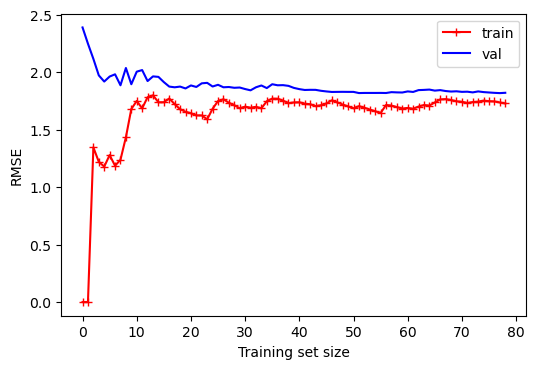

In [13]:
lin_reg = LinearRegression()

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

plot_learning_curves(lin_reg, X, y, ax)
plt.show()

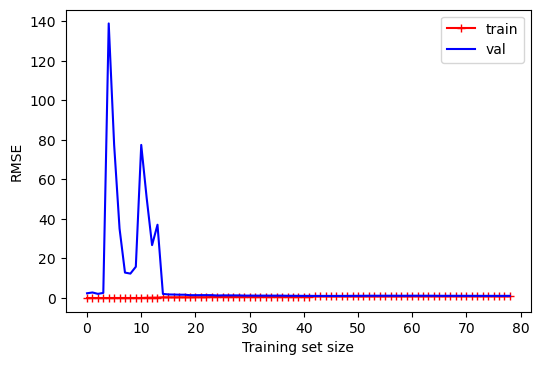

In [14]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

plot_learning_curves(polynomial_regression, X, y, ax)
plt.show()

# Regularized models

In [15]:
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, ElasticNet

In [16]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [17]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [18]:
def plot_model(model_class, αs, ax, polynomial=False, **model_kargs):

    styles = ("b-", "g--", "r:")

    for α, style in zip(αs, styles):
        model = model_class(α, **model_kargs) if α > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features",
                 PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regl = model.predict(X_new)
        ax.plot(X_new, y_new_regl, style, label=f"α = {α}")

    ax.plot(X, y, "b.", linewidth=3)
    ax.set(xlabel="$x_1$")
    ax.legend(loc="upper left", fontsize='medium')

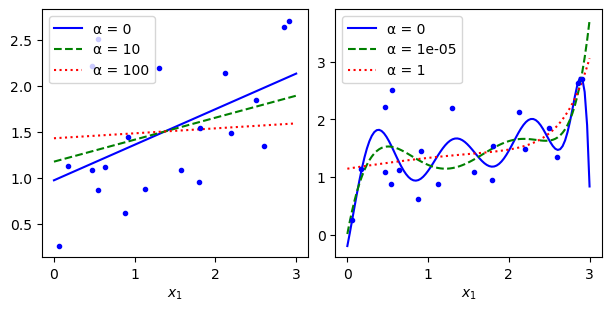

In [19]:
_, axes = plt.subplots(1, 2, figsize=(6, 3), dpi=100, constrained_layout=True)

plot_model(Ridge, αs=(0, 10, 100), ax=axes[0], random_state=42)
plot_model(Ridge,
           αs=(0, 10**-5, 1),
           ax=axes[1],
           polynomial=True,
           random_state=42)

ax.set(ylabel="$y$")
plt.show()

In [20]:
sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.flatten())
sgd_reg.predict([[1.5]])

array([1.47012588])

/usr/local/Caskroom/miniconda/base/envs/kaggle/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


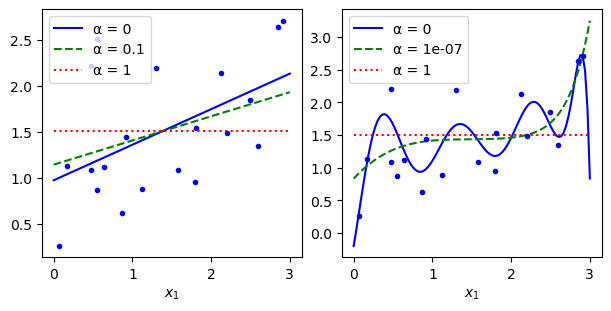

In [21]:
_, axes = plt.subplots(1, 2, figsize=(6, 3), dpi=100, constrained_layout=True)

plot_model(Lasso, αs=(0, 0.1, 1), ax=axes[0], random_state=42, tol=0.0001)
plot_model(Lasso,
           αs=(0, 10**-7, 1),
           polynomial=True,
           ax=axes[1],
           random_state=42, tol=0.0001)
ax.set(ylabel="$y$")

plt.show()

In [22]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [23]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [24]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50],
                                                  y[:50].flatten(),
                                                  test_size=0.5,
                                                  random_state=10)

### Early stopping

In [25]:
from copy import deepcopy

In [26]:
poly_scaler = Pipeline([("poly_features",
                         PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [27]:
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

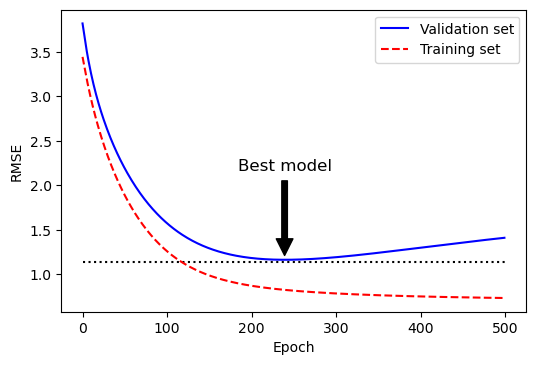

In [28]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.annotate(
    'Best model',
    xy=(best_epoch, best_val_rmse),
    xytext=(best_epoch, best_val_rmse + 1),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize='large',
)

best_val_rmse -= 0.03
ax.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:")
ax.plot(np.sqrt(val_errors), "b-", label="Validation set")
ax.plot(np.sqrt(train_errors), "r--", label="Training set")
ax.legend(loc="upper right")
ax.set(xlabel="Epoch", ylabel="RMSE")

plt.show()

In [29]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [ ]:
def make_mesh(xlims, ylims, h):
    x_min, x_max = xlims
    y_min, y_max = ylims
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))
    return xx, yy

In [30]:
xlims = [-1, 3]
ylims = [-1.5, 1.5]

t1, t2 = make_mesh(xlims, ylims, h=500)
T = np.c_[t1.flatten(), t2.flatten()]

Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [31]:
def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2 / len(X) * X.T.dot(
            X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)

    return np.array(path)

In [32]:
def plot_grid(ax, path_N):
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.plot(0, 0, "ys")
    ax.axis([t1a, t1b, t2a, t2b])
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")

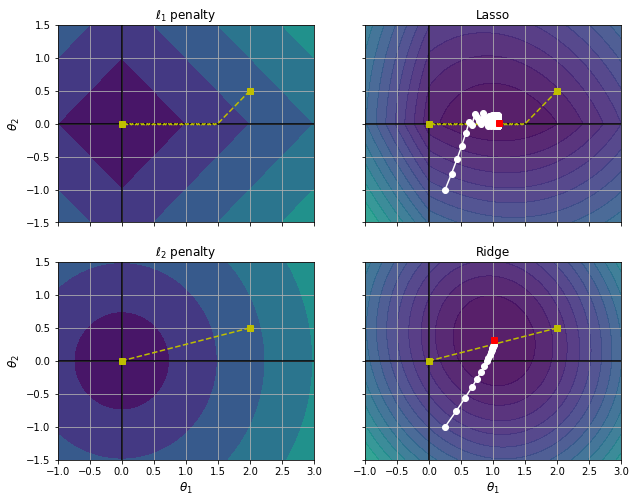

In [33]:
_, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

l1 = [2, 0]
l2 = [0, 2]
titles = ["Lasso", "Ridge"]
Ns = [N1, N2]

for ind, (N, l1, l2, title) in enumerate(zip(Ns, l1, l2, titles)):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2

    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) -
                                                     np.min(J)) + np.min(J)
    levelsJR = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) -
                                                      np.min(JR)) + np.min(JR)
    levelsN = np.linspace(0, np.max(N), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]),
                      Xr,
                      yr,
                      np.sign(l1) / 3,
                      np.sign(l2),
                      core=0)

    ax = axes[ind, 0]
    plot_grid(ax, path_N)
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.set_title(f"$\ell_{ind + 1}$ penalty", fontsize='large')
    if ind == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize='large')
    ax.set_ylabel(r"$\theta_2$", fontsize='large')

    ax = axes[ind, 1]
    plot_grid(ax, path_N)
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize='large')
    if ind == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize='large')

plt.show()